# **Multinomial Logistic Regression - A full project**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Setting logging to print only error messages from sklearn
import logging
logging.basicConfig()
logging.getLogger("SKLEARNEX").setLevel(logging.ERROR)

# Import warnings module
import warnings
warnings.filterwarnings("ignore") # Ignore warnings

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
file_path = '/content/drive/MyDrive/Business Analytics/Teaching materials/MIS 315/Q251/Week 8 - Logistic Regression II/hsb2.xlsx'

In [5]:
df = pd.read_excel(file_path)

# **Exploratory Data Analysis**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       200 non-null    int64 
 1   gender   200 non-null    object
 2   race     200 non-null    object
 3   schtyp   200 non-null    object
 4   prog     200 non-null    object
 5   read     200 non-null    int64 
 6   write    200 non-null    int64 
 7   math     200 non-null    int64 
 8   science  200 non-null    int64 
 9   socst    200 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 15.8+ KB


No missing values are found.

In [7]:
df.describe()

,id,read,write,math,science,socst
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,52.230000,52.775000,52.645000,51.850000,52.405000
std,57.879185,10.252937,9.478586,9.368448,9.900891,10.735793
min,1.000000,28.000000,31.000000,33.000000,26.000000,26.000000
25%,50.750000,44.000000,45.750000,45.000000,44.000000,46.000000
50%,100.500000,50.000000,54.000000,52.000000,53.000000,52.000000
75%,150.250000,60.000000,60.000000,59.000000,58.000000,61.000000
max,200.000000,76.000000,67.000000,75.000000,74.000000,71.000000


In [8]:
df.head()

,id,gender,race,schtyp,prog,read,write,math,science,socst
0,70,male,white,public,general,57,52,41,47,57
1,121,female,white,public,vocational,68,59,53,63,61
2,86,male,white,public,general,44,33,54,58,31
3,141,male,white,public,vocational,63,44,47,53,56
4,172,male,white,public,academic,47,52,57,53,61


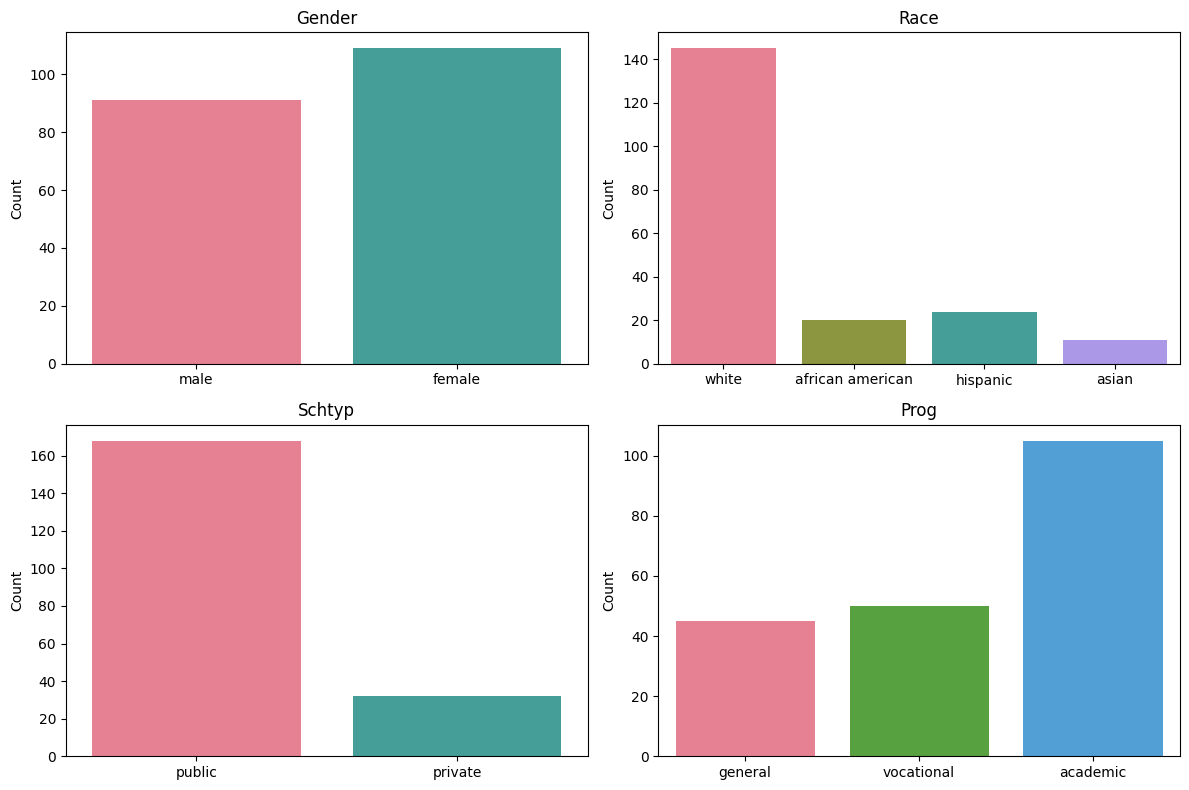

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

categorical_columns = ['gender', 'race', 'schtyp', 'prog']

axes = axes.flatten()

# Plot
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, palette='husl', ax=axes[i])
    axes[i].set_title(col.capitalize(), fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# adjust layout
plt.tight_layout()
plt.show()


**Chi Squared tests**

H0: independent

H1: dependent

In [10]:
from scipy.stats import chi2_contingency

categorical_vars = ['gender', 'schtyp', 'race']

for var in categorical_vars:
    ct = pd.crosstab(df[var], df['prog'])
    chi2, p, dof, expected = chi2_contingency(ct)
    print(f"{var}: p-value = {p:.4f}")

gender: p-value = 0.9739
schtyp: p-value = 0.0097
race: p-value = 0.5621


The results indicate that "gender" and "race" are independent on "prog"

# **Model Development**

In [11]:
df.head()

,id,gender,race,schtyp,prog,read,write,math,science,socst
0,70,male,white,public,general,57,52,41,47,57
1,121,female,white,public,vocational,68,59,53,63,61
2,86,male,white,public,general,44,33,54,58,31
3,141,male,white,public,vocational,63,44,47,53,56
4,172,male,white,public,academic,47,52,57,53,61


In [12]:
import pandas as pd
import statsmodels.formula.api as smf

# Set 'academic' being the reference
df['prog'] = pd.Categorical(df['prog'], categories=['academic','general','vocational'])
df['prog_code'] = df['prog'].cat.codes  # academic→0, general→1, vocational→2

# fit multinomial
model1 = smf.mnlogit('prog_code ~ C(schtyp) + read + write + math + science + socst', data=df)
res1 = model1.fit()
print(res1.summary())


Optimization terminated successfully.
         Current function value: 0.808756
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:              prog_code   No. Observations:                  200
Model:                        MNLogit   Df Residuals:                      186
Method:                           MLE   Df Model:                           12
Date:                Sun, 02 Nov 2025   Pseudo R-squ.:                  0.2075
Time:                        10:44:06   Log-Likelihood:                -161.75
converged:                       True   LL-Null:                       -204.10
Covariance Type:            nonrobust   LLR p-value:                 5.218e-13
        prog_code=1       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.3016      1.581      2.721      0.007       1.203       7.400
C(

The variable "write" is insignificant in two binary classification model. Remove it and rebuild the model.

**Model 2**

In [13]:
# fit multinomial
model2 = smf.mnlogit('prog_code ~ C(schtyp) + read + math + science + socst', data=df)
res2 = model2.fit()
print(res2.summary())

Optimization terminated successfully.
         Current function value: 0.811564
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:              prog_code   No. Observations:                  200
Model:                        MNLogit   Df Residuals:                      188
Method:                           MLE   Df Model:                           10
Date:                Sun, 02 Nov 2025   Pseudo R-squ.:                  0.2047
Time:                        10:44:06   Log-Likelihood:                -162.31
converged:                       True   LL-Null:                       -204.10
Covariance Type:            nonrobust   LLR p-value:                 9.997e-14
        prog_code=1       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.0312      1.533      2.630      0.009       1.027       7.036
C(

**Model 3**

In [14]:
# fit multinomial
model3 = smf.mnlogit('prog_code ~ C(schtyp) + math + science + socst', data=df)
res3 = model3.fit()
print(res3.summary())

Optimization terminated successfully.
         Current function value: 0.819094
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:              prog_code   No. Observations:                  200
Model:                        MNLogit   Df Residuals:                      190
Method:                           MLE   Df Model:                            8
Date:                Sun, 02 Nov 2025   Pseudo R-squ.:                  0.1973
Time:                        10:44:06   Log-Likelihood:                -163.82
converged:                       True   LL-Null:                       -204.10
Covariance Type:            nonrobust   LLR p-value:                 3.779e-14
        prog_code=1       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.8544      1.513      2.548      0.011       0.890       6.819
C(

# **Goodness of Fit**

**Pseudo R² (McFadden’s)**

---



In [15]:
print("McFadden R²:", res3.prsquared)

McFadden R²: 0.19734671321044372


A McFadden’s Pseudo R² of 0.2 indicates a moderate model fit, suggesting that the included predictors provide a reasonable level of explanatory power.

**Likelihood Ratio Test**

---



**Null**: The fitted model is not an improvement over the null (intercept-only) model.
- B1=B2=...Bn=0

**ALternative**:  The fitted model is a significant improvement over the null model.
- At least one B is different from 0

In [16]:
from scipy.stats import chi2

# Log-likelihoods
LL_full = res3.llf        # full model log-likelihood
LL_null = res3.llnull     # null (intercept-only) model log-likelihood

# Test statistic
LR_stat = -2 * (LL_null - LL_full)
df_diff = res3.df_model
p_val = chi2.sf(LR_stat, df_diff)

print(f"Likelihood Ratio Test: χ²({df_diff}) = {LR_stat:.2f}, p = {p_val:.4f}")


Likelihood Ratio Test: χ²(8.0) = 80.56, p = 0.0000


p-value < significance level --> reject H0. The fitted model fits significantly better than the intercept-only model.

# **Classification Performance**

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

pred_probs = res3.predict()
pred_class = np.argmax(pred_probs, axis=1)
true_class = df['prog_code'].values

cm = confusion_matrix(true_class, pred_class)
acc = accuracy_score(true_class, pred_class)
report = classification_report(true_class, pred_class, target_names=df['prog'].cat.categories)

print("Confusion Matrix:\n", cm)
print("\nAccuracy:", round(acc, 4))
print("\nClassification Report:\n", report)


Confusion Matrix:
 [[91  4 10]
 [26  5 14]
 [15  4 31]]

Accuracy: 0.635

Classification Report:
               precision    recall  f1-score   support

    academic       0.69      0.87      0.77       105
     general       0.38      0.11      0.17        45
  vocational       0.56      0.62      0.59        50

    accuracy                           0.64       200
   macro avg       0.55      0.53      0.51       200
weighted avg       0.59      0.64      0.59       200



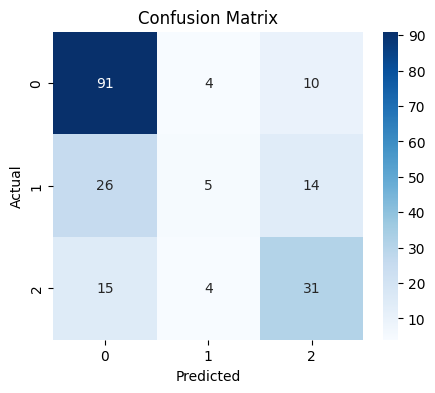

In [18]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The accuracy of the model is 64%, which indicates a good classification ability.

# **Model Interpretation**

In [19]:
print(res3.summary())

                          MNLogit Regression Results                          
Dep. Variable:              prog_code   No. Observations:                  200
Model:                        MNLogit   Df Residuals:                      190
Method:                           MLE   Df Model:                            8
Date:                Sun, 02 Nov 2025   Pseudo R-squ.:                  0.1973
Time:                        10:44:06   Log-Likelihood:                -163.82
converged:                       True   LL-Null:                       -204.10
Covariance Type:            nonrobust   LLR p-value:                 3.779e-14
        prog_code=1       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.8544      1.513      2.548      0.011       0.890       6.819
C(schtyp)[T.public]     0.6735      0.534      1.262      0.207      -0.372       1.719
math            

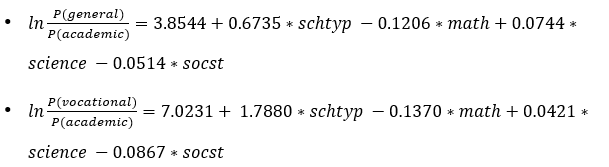

**Example**: If a student has graduated from a public university and has achieved an exam score of 38 (math), 36 (science) and 46 (social study), which programme will he/she be enrolled to?

In [20]:
new_obs = pd.DataFrame({
    'schtyp': ['public'],
    'math': [38],
    'science': [36],
    'socst': [46]
})

# Predict probabilities
pred_prob = res3.predict(new_obs)

# Predicted class (index with highest probability)
pred_class = np.argmax(pred_prob.values, axis=1)

print("Predicted probabilities:\n", pred_prob)
print("\nPredicted class code:", pred_class[0])

Predicted probabilities:
           0         1         2
0  0.185337  0.240195  0.574467

Predicted class code: 2


This student will be enrolled to vocational programme.

# **Citing This Notebook**
If you use this notebook in your work, please cite it as follows:

Linh, H. (2025). Principles of Data Analytics. Lecture examples and exercises. (Version 1.0.0). URL: https://github.com/MsLinhEIU/MIS-315---Principles-of-Data-Analytics/tree/main